## ARIMA

### AR & MA Models
In time series, autoregression(AR) and moving average (MA) models provide a simple description of a process in terms of two factors--one for autoregression and the other for moving average. The AR part entails regressing the variable on its own lagged values. The idea is that the previous time period's value can help us predict the current time period's value. The MA part involves modeling the error term as a linear combination of error terms occurring at the same time step and at various times in the past.

### Autoregressive Models
Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series. It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. Both the t-1 and t-2 are lags of the time series y. The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.

AR(1) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $e_{t}$

AR(2) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $a_{2}$ $y_{t-2}$ + $e_{t}$

We typically represent the order of the model as p for an AR model such as AR(p).

### Moving Average Models
Moving average (MA) is a process where the present value of a time series, y, is defined as a linear combination of past errors. The error term (noise) is represented as e. Both the t-1 and t-2 are lags of the time on the errors.

MA(1) model: $y_{t}$ = $m_{1}$ $e_{t-1}$ + $e_{t}$

MA(2) model: $y_{t}$ = $m_{1}$ $e_{t-1}$ + $m_{2}$ $e_{t-2}$ + $e_{t}$

We typically represent the order of the model as q for a MA model such as MA(q).

### ARMA Models
We can combine both Autoregressive and Moving Average models together to create an ARMA model. The time series is regressed on the previous values and the previous errors.

ARMA(1,1) model: $y_{t}$ = $a_{1}$ $y_{t-1}$ + $m_{1}$ $e_{t-1}$

For ARMA(p, q), p is the order of the AR process and q is the order of the MA process.

## Forecast quality metrics

Before we begin forecasting, let's understand how to measure the quality of our predictions and take a look at the most commonly used metrics.

- [R squared](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination): coefficient of determination (in econometrics, this can be interpreted as the percentage of variance explained by the model), $(-\infty, 1]$

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ 

```python
sklearn.metrics.r2_score
```
---
- [Mean Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error): this is an interpretable metric because it has the same unit of measurment as the initial series, $[0, +\infty)$

$MAE = \frac{\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|}{n}$ 

```python
sklearn.metrics.mean_absolute_error
```
---
- [Median Absolute Error](http://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error): again, an interpretable metric that is particularly interesting because it is robust to outliers, $[0, +\infty)$

$MedAE = median(|y_1 - \hat{y}_1|, ... , |y_n - \hat{y}_n|)$

```python
sklearn.metrics.median_absolute_error
```
---
- [Mean Squared Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error): the most commonly used metric that gives a higher penalty to large errors and vice versa, $[0, +\infty)$

$MSE = \frac{1}{n}\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

```python
sklearn.metrics.mean_squared_error
```
---
- [Mean Squared Logarithmic Error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-logarithmic-error): practically, this is the same as MSE, but we take the logarithm of the series. As a result, we give more weight to small mistakes as well. This is usually used when the data has exponential trends, $[0, +\infty)$

$MSLE = \frac{1}{n}\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$

```python
sklearn.metrics.mean_squared_log_error
```
---
- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model to management, $[0, +\infty)$

$MAPE = \frac{100}{n}\sum\limits_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

### Analítica
Vamos a utilizar los datos de ventas de Johnson&Johnson

In [1]:
# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/jj.csv', index_col=0)
print(len(data))
data.head()

84


,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61


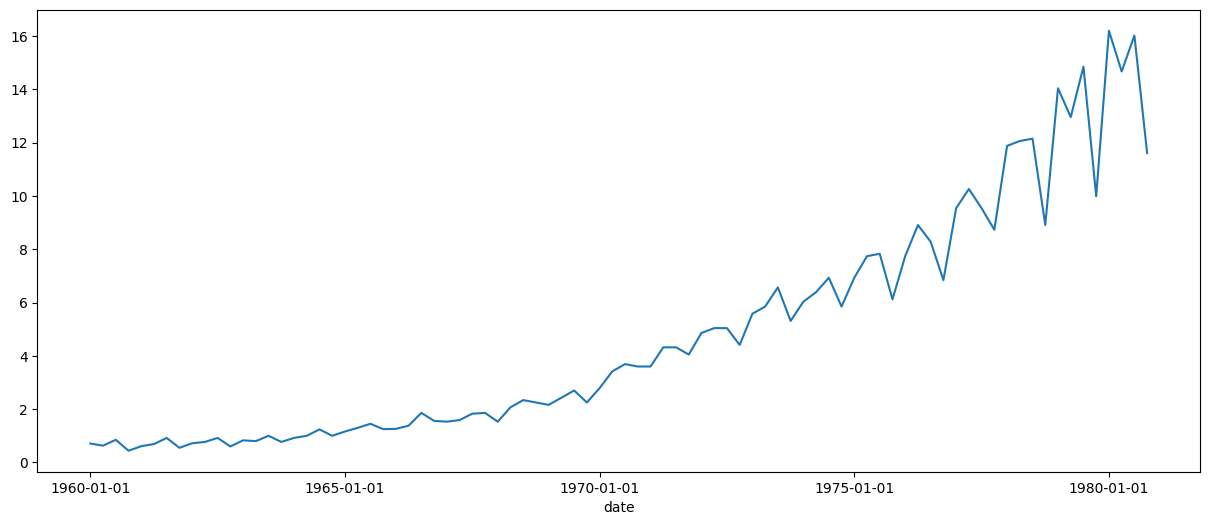

In [3]:
data['data'].plot(figsize=(15,6));

Se aprecia en la gráfica que presenta diferentes estadísticos a lo largo del tiempo.

Representamos su gráfica de autocorrelación. Vemos que tenemos muy complicado determinar el orden p y q, de cara al modelo ARIMA.

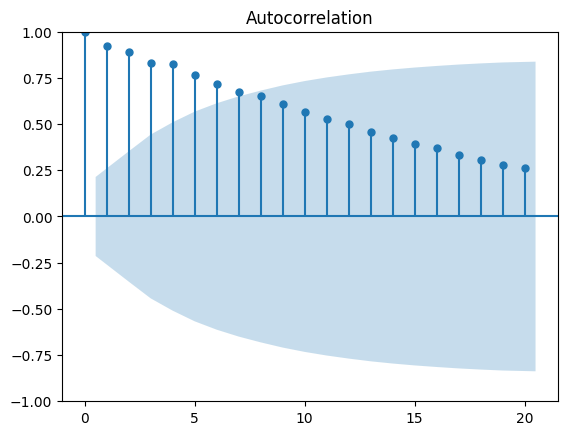

In [4]:
plot_acf(data['data']);

Dividimos en train y test

In [5]:
X = data['data'].values
train = X[:70]
test = X[70:]

In [6]:
len(X)

84

In [7]:
test

array([ 9.54    ,  8.729999, 11.88    , 12.06    , 12.15    ,  8.91    ,
       14.04    , 12.96    , 14.85    ,  9.99    , 16.2     , 14.67    ,
       16.02    , 11.61    ])

In [8]:
len(test)

14

In [9]:
train

array([ 0.71,  0.63,  0.85,  0.44,  0.61,  0.69,  0.92,  0.55,  0.72,
        0.77,  0.92,  0.6 ,  0.83,  0.8 ,  1.  ,  0.77,  0.92,  1.  ,
        1.24,  1.  ,  1.16,  1.3 ,  1.45,  1.25,  1.26,  1.38,  1.86,
        1.56,  1.53,  1.59,  1.83,  1.86,  1.53,  2.07,  2.34,  2.25,
        2.16,  2.43,  2.7 ,  2.25,  2.79,  3.42,  3.69,  3.6 ,  3.6 ,
        4.32,  4.32,  4.05,  4.86,  5.04,  5.04,  4.41,  5.58,  5.85,
        6.57,  5.31,  6.03,  6.39,  6.93,  5.85,  6.93,  7.74,  7.83,
        6.12,  7.74,  8.91,  8.28,  6.84,  9.54, 10.26])

## Autoregressive
Tendremos que encontrar el orden de autoregression que mejor encaje con nuestros datos.El arima TIENE TODO: EL AUTOREGRESIVO, EL MOVING AVERAGE Y EL arima

In [10]:
model_ar = ARIMA(order=(1,0,0))
model_ar.fit(train)

ARIMA(order=(1, 0, 0))

In [11]:
predictions = model_ar.predict(14)
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

root_mean_squared_error: 3.701190815539727


In [12]:
predictions

array([10.18960874, 10.12012387, 10.05153371,  9.98382676,  9.91699163,
        9.8510171 ,  9.78589208,  9.72160565,  9.65814699,  9.59550546,
        9.53367053,  9.47263181,  9.41237905,  9.35290214])

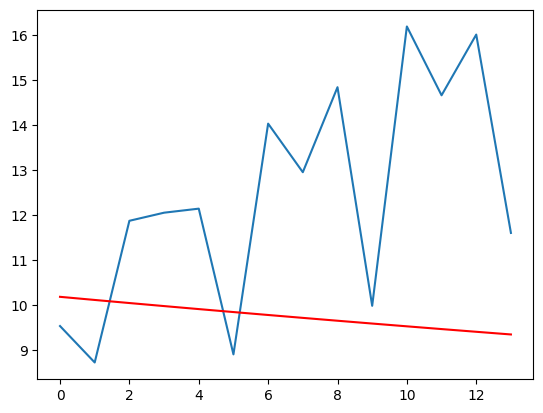

In [13]:
plt.plot(test)
plt.plot(predictions,color='red');

No parece que de buen resultado el AR(1,0,0). Probemos diferentes lags, a ver cuál sería el mejor

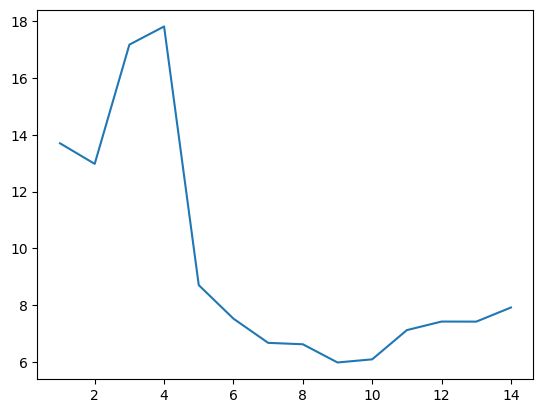

In [14]:
lags = []
mse = []
for lag in range(1, 15):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar.fit(train)
        lags.append(lag)
        predictions = model_ar.predict(14)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Un parámetro p>5 parece que da buen resultado, pero aun asi es muy alto el error.

## Moving Average
En este caso tendremos en cuenta los errores. El problema es que si tenemos muchos errores al principio, los iremos arrastrando durante las predicciones.

In [15]:
model_ma = ARIMA(order = (0,0,1))
model_ma.fit(train)

ARIMA(order=(0, 0, 1))

In [16]:
predictions = model_ma.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 87.15679101941669


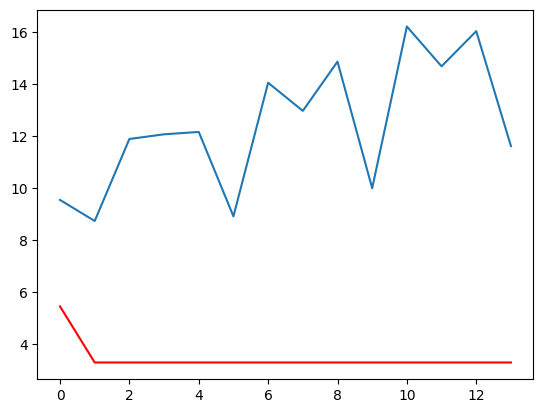

In [17]:
plt.plot(test)
plt.plot(predictions,color='red');

No está dando buen resultado. Probaremos entonces varios lags

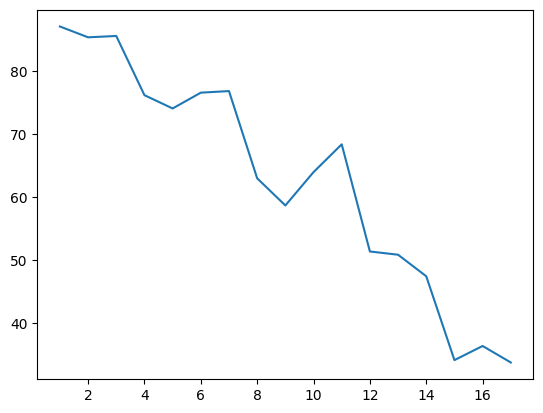

In [18]:
lags = []
mse = []
for lag in range(1, 20):
    try:
        model_ar = ARIMA(order=(0, 0, lag))
        model_ar_fit = model_ar.fit(train)
        predictions = model_ar_fit.predict(14)
        lags.append(lag)
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);

Parece que según vamos aumentando el parámetro `q` del modelo Moving Average, va disminuyendo el error, pero aun así es bastante grande.

## ARIMA
En el arima no solo influyen los parámetros `p` y `q`, sino que también tendremos en cuenta `d`. Parametro con el que diferenciaremos la serie y conseguiremos que sea estacionaria.

Ahora bien, ¿cuál es la mejor combinación de parámetros? Tendremos que realizar varias pruebas. Para comparar los modelos se suele utilizar el AIC.

### AIC
Akaike’s Information Criterion

![imagen](./img/aic.png)

k es el número de parámetros del modelo estadístico y L es el máximo valor de la función de verosimilitud para el modelo estimado. La función de verosimilitud permite realizar inferencias a partir de u conjunto de observaciones.

Se utiliza para seleccionar el mejor modelo, que será el que tiene menor AIC. El AIC depende mucho de cada dato, y es una medida de comparación entre modelos, no de presentación de resultados. Un AIC bajo no quiere decir que el modelo sea muy bueno. Por tanto, AIC no nos dice nada sobre la calidad del modelo en terminos absolutos.


#### ¿Cómo conseguir los mejores p, d, q?

In [19]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [20]:
len(pdq)

125

In [21]:
results = []
for param in pdq:
    try:
        model_arima = ARIMA(order=param)
        model_arima_fit = model_arima.fit(train)
        results.append((param,model_arima_fit.aic()))
    except:
        continue
    

In [22]:
resultados_df = pd.DataFrame(results, columns=['ARIMA params', 'AIC']).sort_values('AIC')
resultados_df.head()

,ARIMA params,AIC
87,"(3, 2, 2)",36.987661
111,"(4, 2, 1)",38.149904
88,"(3, 2, 3)",38.286739
112,"(4, 2, 2)",38.630135
113,"(4, 2, 3)",40.307203


In [23]:
len(resultados_df)

124

Ya tenemos la mejor combinación de parámetros para el ARIMA. Probemos el modelo

In [24]:
best_model = ARIMA(order=(3,2,2))
best_model.fit(train)

ARIMA(order=(3, 2, 2))

In [25]:
predictions = best_model.predict(14)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 3.942692909939841


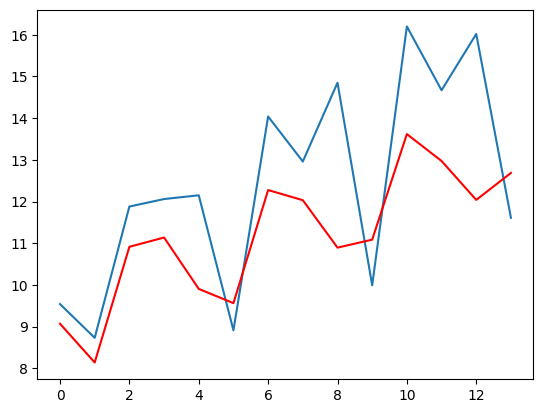

In [26]:
plt.plot(test)
plt.plot(predictions,color='red');

### Auto ARIMA

In [27]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=138.619, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=196.672, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=180.443, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=140.942, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=113.935, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=166.323, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=47.310, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=44.000, Time=0.23 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=43.451, Time=0.33 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=51.018, Time=0.23 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=40.759, Time=0.40 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=44.612, Time=0.28 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=42.841, Time=0.42 s

In [28]:
model = ARIMA(order=(3,2,2))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(3, 2, 2)   Log Likelihood                 -11.494
Date:                Fri, 02 Jun 2023   AIC                             36.988
Time:                        19:28:53   BIC                             52.524
Sample:                             0   HQIC                            43.144
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0175      0.002      7.145      0.000       0.013       0.022
ar.L1         -1.1084      0.054    -20.582      0.000      -1.214      -1.003
ar.L2         -1.0935      0.050    -22.061      0.0

``Dep. Variable`` (Variable dependiente): Este es el nombre de la variable que el modelo está tratando de predecir o explicar.

``No. Observations`` (Número de observaciones): Es el número total de puntos de datos utilizados en el análisis.

``Model`` (Modelo): Este es el tipo de modelo utilizado, en este caso, un SARIMAX(3, 2, 2). Los números en paréntesis indican los parámetros del modelo: (orden de autorregresión, orden de diferenciación, orden de media móvil).

``Log Likelihood`` (Log-verosimilitud): Este es el logaritmo de la función de verosimilitud. Cuanto más grande sea este número (es decir, menos negativo), mejor se ajusta el modelo a los datos.

``AIC`` (Criterio de Información de Akaike), ``BIC`` (Criterio de Información Bayesiano), ``HQIC`` (Criterio de Información de Hannan-Quinn): Estas son diferentes medidas que tratan de equilibrar la calidad del ajuste del modelo con la simplicidad del modelo (es decir, cuántos parámetros tiene). Normalmente, se prefiere el modelo con el valor más bajo de estos criterios.

``Date y Time`` (Fecha y Hora): Esta es la fecha y hora en que se realizó el análisis.

``Sample`` (Muestra): Este es el rango de los datos utilizados en el análisis.

``Covariance Type`` (Tipo de Covarianza): Es el tipo de matriz de covarianza utilizada para estimar los errores estándar de los coeficientes.

El resto de la tabla muestra los coeficientes del modelo para cada término. Cada coeficiente representa el cambio esperado en la variable dependiente para un cambio de una unidad en la variable correspondiente, manteniendo constantes todas las demás variables. Los términos ``"ar.L1"``, ``"ar.L2"``, etc., se refieren a los lags de autorregresión y los términos ``"ma.L1"``, ``"ma.L2"``, etc., se refieren a los lags de la media móvil.

Finalmente, ``"sigma2"`` es la varianza de los residuos (errores) del modelo. La prueba de la hipótesis nula de que cada coeficiente es igual a cero se realiza con una prueba z, y el valor de p asociado se informa en la columna ``"P>|z|"``. Los coeficientes cuyo valor de p es menor que 0.05 se consideran generalmente como estadísticamente significativos.

## ARIMAX
La X viene de exogenous. Significa que le podemos añadir una variable externa con la que entrenar el modelo.

Vamos a probar con los datos de la bolsa. Primero un auto_arima con los datos a cierre. Y después un auto_arima acompañado de los datos de apertura de bolsa, a ver cuánto ayudan a predecir el cierre.

In [29]:
stock_df = pd.read_csv('data/FB.csv', header=0, index_col=0)
print(len(stock_df))
stock_df.head()

1259


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


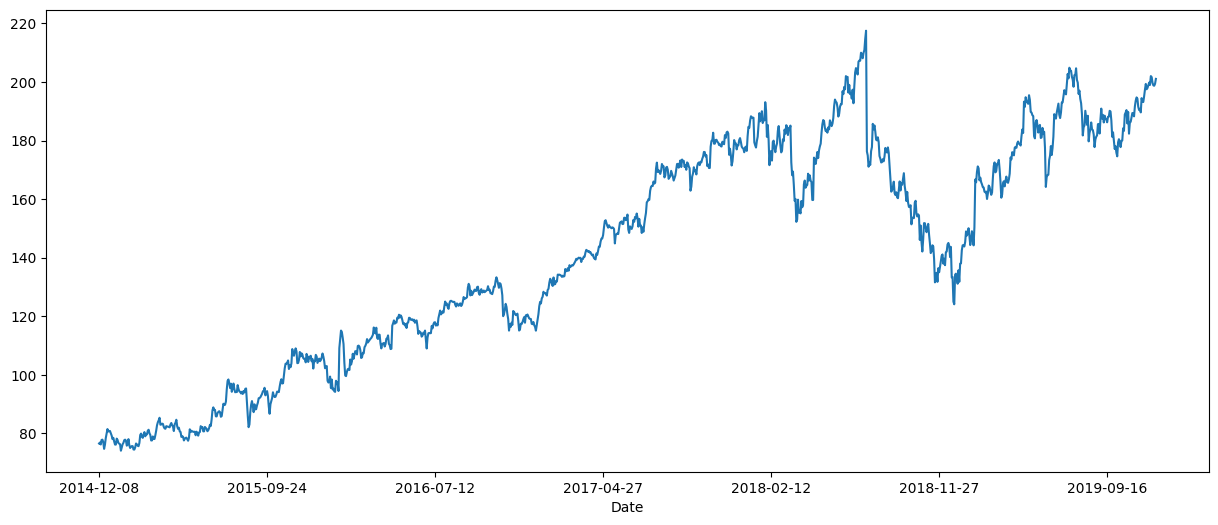

In [30]:
stock_df['Close'].plot(figsize=(15,6));

In [31]:
len(stock_df['Close'])

1259

In [32]:
stock_df['Close'][:600].describe()

count    600.000000
mean     106.499583
std       19.865461
min       74.050003
25%       87.932497
50%      107.840001
75%      121.807497
max      146.559998
Name: Close, dtype: float64

In [33]:
stock_df['Close'][600:].describe()

count    659.000000
mean     173.255326
std       17.356365
min      124.059998
25%      162.514999
50%      175.130005
75%      185.550003
max      217.500000
Name: Close, dtype: float64

Vemos primero ejemplo sin variable exogena

In [34]:
train = stock_df['Close'][0:1240].values
test = stock_df['Close'][1240:].values

In [35]:
len(test)

19

Vamos a probar varios ARIMAS, a ver cuál sería la mejor combinación de hiperparámetros.

In [36]:
stepwise_model = auto_arima(train,
                            start_p=1,
                            start_q=1,
                            max_d=3,
                            max_p=5,
                            max_q=5,
                            stationary=False,
                            trace=True,
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.14 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.831 seconds
5973.07958330898


Ya lo tenemos, ahora montaremos el modelo con esos hiperparámetros y vemos que AIC tiene.

In [37]:
model = ARIMA(order=(1,1,1))
model.fit(train)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Fri, 02 Jun 2023   AIC                           5973.080
Time:                        19:28:58   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

``Ljung-Box (L1) (Q)``: Esta es una prueba estadística para determinar si hay autocorrelación en los residuos de tu modelo. Si hay autocorrelación, puede ser una señal de que el modelo no ha capturado toda la estructura de los datos. El valor Q es la estadística de la prueba, y "Prob(Q)" es la probabilidad de obtener este valor si la hipótesis nula (de que no hay autocorrelación) es cierta. En este caso, el valor p es bastante alto (0.65), lo que sugiere que no hay evidencia fuerte de autocorrelación en los residuos.

``Jarque-Bera (JB)``: Esta es una prueba que verifica si los residuos de tu modelo tienen una distribución normal. JB es la estadística de la prueba, y "Prob(JB)" es la probabilidad de obtener esta estadística si la hipótesis nula (de que los residuos siguen una distribución normal) es cierta. En este caso, el valor p es muy bajo (0.00), lo que indica que puedes rechazar la hipótesis nula de normalidad. Los residuos probablemente no siguen una distribución normal.

``Heteroskedasticity (H)``: Esta es una prueba que verifica si la varianza de los residuos de tu modelo es constante (homoscedasticidad) o si cambia en función de las variables independientes (heteroscedasticidad). "H" es la estadística de la prueba, y "Prob(H) (two-sided)" es la probabilidad de obtener esta estadística si la hipótesis nula (de que hay homoscedasticidad) es cierta. En este caso, el valor p es muy bajo (0.00), lo que sugiere que puedes rechazar la hipótesis nula de homoscedasticidad. Esto puede ser una señal de que tu modelo podría mejorarse.

``Skew (Asimetría)``: Esta es una medida de la asimetría de la distribución de tus residuos. Una asimetría de 0 indica una distribución simétrica. La asimetría negativa sugiere que la cola izquierda de la distribución es más larga o más gruesa que la derecha.

``Kurtosis (Curtosis)``: Esta es una medida del "pico" o "colas" de la distribución de tus residuos. Una curtosis de 3 indica una distribución normal. En este caso, la curtosis es bastante alta (49.58), lo que sugiere que hay más valores extremos (outliers) de los que se esperarían en una distribución normal.

In [38]:
predictions = model.predict(19)
print("mean_squared_error:", mean_squared_error(test, predictions))

mean_squared_error: 45.03476955184628


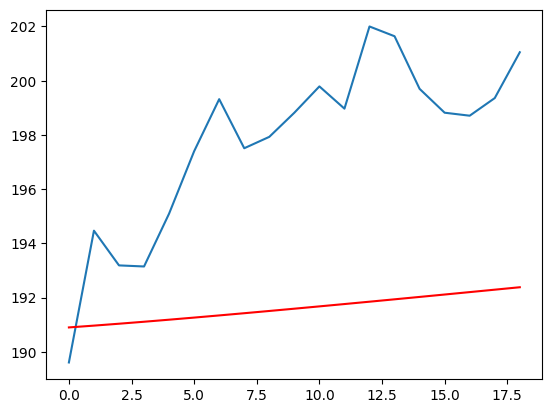

In [39]:
plt.plot(test)
plt.plot(predictions,color='red');

Vamos ahora a compararlo con el mismo modelo, pero en este caso le añadimos una variable exogena al entrenamiento

In [40]:
stock_df[['Open']][:1240].values

array([[ 76.18    ],
       [ 75.199997],
       [ 76.650002],
       ...,
       [194.029999],
       [191.910004],
       [190.      ]])

In [41]:
model = ARIMA(order=(1,1,1))
model.fit(train, exogenous = stock_df['Open'][:1240].values.reshape(-1,1))
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Fri, 02 Jun 2023   AIC                           5973.080
Time:                        19:28:59   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.0

Reduce bastante el AIC

Probemos a entrenar el auto arima con la variable exogena

In [59]:
model = auto_arima(train,
                   exogenous = stock_df['Open'][:1240].values.reshape(-1,1),
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.851 seconds
5973.07958330898


Probemos varias variables exogenas

NOTA: para este apartado se utiliza el valor 'Low', que en la vida real no lo tendriamos para realizar la predicción.

In [42]:
model = auto_arima(train,
                   exogenous = stock_df[['Open', 'Low']][:1240].values,
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5973.080, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5975.597, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5977.174, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5977.161, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5975.049, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5974.760, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5978.841, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5978.892, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5973.656, Time=0.18 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.938 seconds
5973.07958330898


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2982.540
Date:                Fri, 02 Jun 2023   AIC                           5973.080
Time:                        19:32:46   BIC                           5993.568
Sample:                             0   HQIC                          5980.785
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0125      0.012      1.065      0.287      -0.010       0.035
ar.L1          0.8642      0.086     10.019      0.000       0.695       1.033
ma.L1         -0.9007      0.075    -11.983      0.000      -1.048      -0.753
sigma2         7.2179      0.082     88.323      0.000       7.058       7.378
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):            113668.86
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.82   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

mean_squared_error: 45.03476955184628


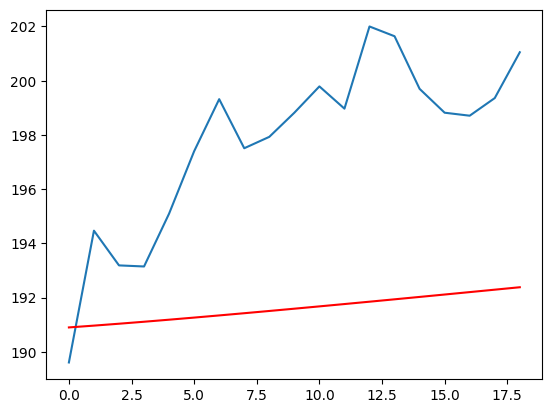

In [45]:
model = ARIMA(order=(3,1,1))
model.fit(train, exogenous = stock_df[['Open', 'Low']][:1240].values)
predictions = model.predict(19 , exogenous = stock_df[['Open', 'Low']][1240:])
print("mean_squared_error:", mean_squared_error(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

## SARIMA
Veamos cómo podemos predecir con datos que tienen estacionalidad, es decir, que cuentan con un patrón que se repite a lo largo del tiempo.

In [46]:
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


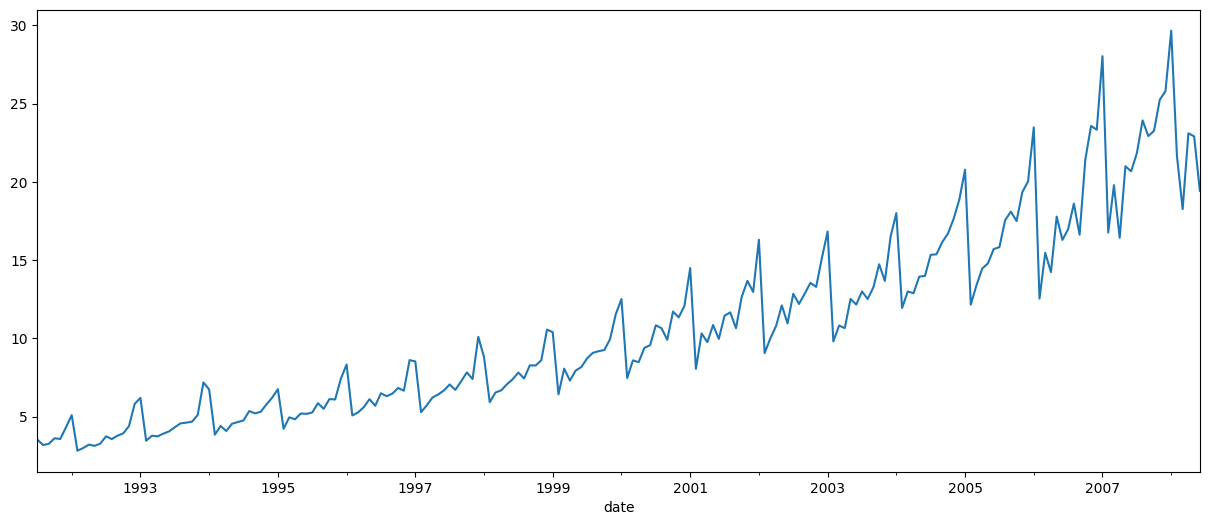

In [47]:
df['value'].plot(figsize=(15,6));

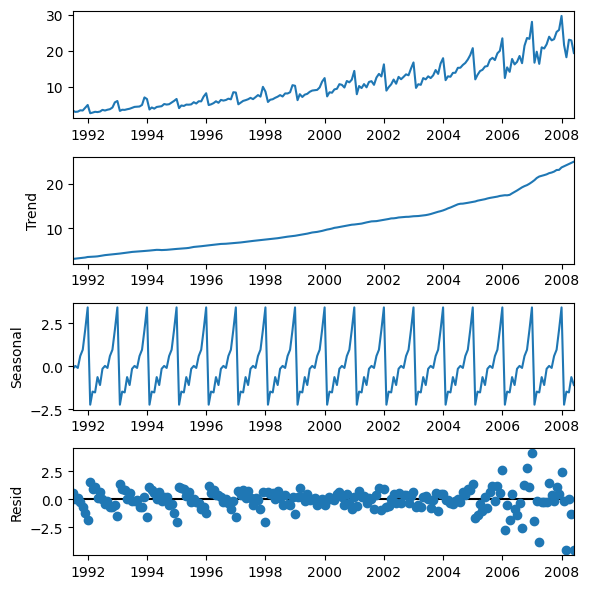

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df[['value']], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();

In [49]:
X = df[['value']]
train = X[:-20]
test = X[-20:]

In [50]:
len(test)

20

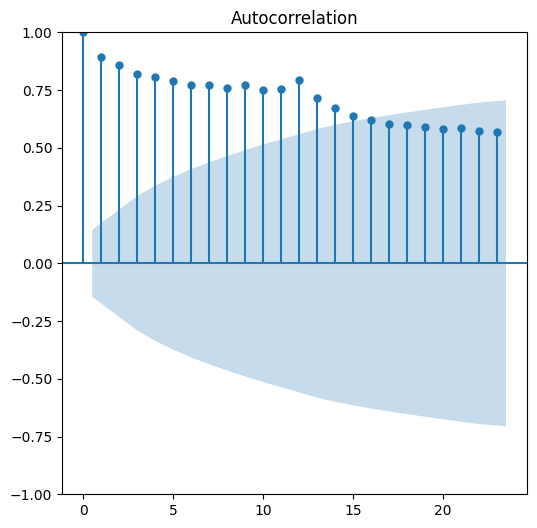

In [51]:
plot_acf(train);

Probemos el auto arima sin indicarle que hay componente de seasonality

In [52]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.391, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764.142, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=739.394, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.405, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=762.612, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=700.332, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=700.362, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=699.998, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=736.404, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=695.600, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=697.194, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=697.299, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=700.821, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=699.306, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=690.2

Ahora le añadimos el componente seasonality mediante el parametro `m`.

In [53]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True)

print(model.aic())

predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=359.383, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=480.967, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=391.380, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=366.538, Time=0.21 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=357.778, Time=0.21 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=367.053, Time=0.08 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=358.591, Time=0.78 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=361.813, Time=0.16 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=357.470, Time=1.26 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=356.290, Time=1.02 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=354.319, Time=0.77 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=353.117, Time=0.43 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=362.795, Time=0.49 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=378.264, Time=0.30 sec
 ARIMA(2,1,1)(2,1,0)[12]         

In [54]:
predictions

2006-11-01    18.462724
2006-12-01    22.399442
2007-01-01    23.874958
2007-02-01    14.847284
2007-03-01    17.579276
2007-04-01    15.729546
2007-05-01    19.764121
2007-06-01    17.496404
2007-07-01    19.470334
2007-08-01    19.729469
2007-09-01    19.042984
2007-10-01    22.564314
2007-11-01    20.645512
2007-12-01    23.974428
2008-01-01    25.298948
2008-02-01    16.799058
2008-03-01    18.799328
2008-04-01    18.113821
2008-05-01    20.736075
2008-06-01    19.648539
Freq: MS, dtype: float64

In [55]:
test.values

array([[23.575517  ],
       [23.334206  ],
       [28.038383  ],
       [16.763869  ],
       [19.792754  ],
       [16.427305  ],
       [21.000742  ],
       [20.681002  ],
       [21.83489   ],
       [23.93020353],
       [22.93035694],
       [23.26333992],
       [25.25003022],
       [25.80609   ],
       [29.665356  ],
       [21.654285  ],
       [18.264945  ],
       [23.107677  ],
       [22.91251   ],
       [19.43174   ]])

mean_squared_error: 10.056001875174278


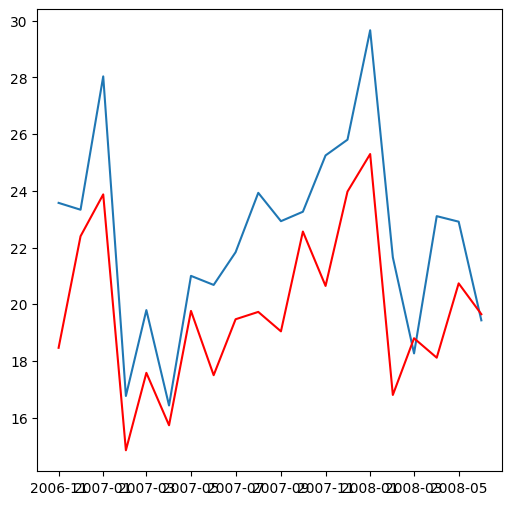

In [57]:
predictions = model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))
plt.plot(test)
plt.plot(predictions,color='red');

## Transoformar dataset para poder predecir con otros modelos

In [58]:
import pandas as pd
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
print(len(df))
df.head()

204


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [59]:
for i in range(12,0,-1):
    df['t-'+str(i)] = df['value'].shift(i)

df.dropna(inplace=True)
df

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1992-07-01,3.737851,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523
1992-08-01,3.558776,3.180891,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851
1992-09-01,3.777202,3.252221,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776
1992-10-01,3.924490,3.611003,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202
1992-11-01,4.386531,3.565869,4.306371,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-02-01,21.654285,16.763869,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356
2008-03-01,18.264945,19.792754,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285
2008-04-01,23.107677,16.427305,21.000742,20.681002,21.834890,23.930204,22.930357,23.263340,25.250030,25.806090,29.665356,21.654285,18.264945
